In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Q1. Import the cifar10 dataset from ‘keras.datasets’. Perform all the data preprocessing required


In [2]:
from keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
x_train=x_train.astype('float64')/255
x_test=x_test.astype('float64')/255

In [6]:
x_train.dtype


dtype('float64')

In [7]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [8]:
from keras.utils import np_utils
from keras.utils import to_categorical

In [37]:
num_classes= len(np.unique(y_train))

In [38]:
num_classes

10

In [11]:
print(y_train)
len(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


50000

In [12]:
y_train= to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

In [13]:
(y_train, y_valid) = y_train[5000:], y_train[:5000]
(x_train, x_valid) = x_train[5000:], x_train[:5000]

In [14]:
print(y_train.shape)
print(x_train.shape)

(45000, 10)
(45000, 32, 32, 3)


In [15]:
print(y_valid.shape)
print(x_valid.shape)

(5000, 10)
(5000, 32, 32, 3)


## Q2. Build a CNN architecture with Keras and stack an ANN on top of CNN

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [17]:
model=Sequential()

In [18]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

In [19]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))


In [20]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

In [22]:
model.add(Flatten())

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

In [24]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [25]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [26]:
model.add(Dense(units=10,activation='softmax',kernel_initializer='uniform'))

In [27]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0

In [29]:
answers=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),shuffle=True,epochs=10,verbose=2,batch_size=500)

Epoch 1/10
90/90 - 41s - loss: 2.1176 - accuracy: 0.1728 - val_loss: 1.9472 - val_accuracy: 0.2266 - 41s/epoch - 457ms/step
Epoch 2/10
90/90 - 42s - loss: 1.8663 - accuracy: 0.2628 - val_loss: 1.7881 - val_accuracy: 0.3020 - 42s/epoch - 464ms/step
Epoch 3/10
90/90 - 46s - loss: 1.7051 - accuracy: 0.3376 - val_loss: 1.6573 - val_accuracy: 0.3620 - 46s/epoch - 516ms/step
Epoch 4/10
90/90 - 37s - loss: 1.6441 - accuracy: 0.3706 - val_loss: 1.6129 - val_accuracy: 0.3846 - 37s/epoch - 408ms/step
Epoch 5/10
90/90 - 36s - loss: 1.5599 - accuracy: 0.4109 - val_loss: 1.5180 - val_accuracy: 0.4274 - 36s/epoch - 399ms/step
Epoch 6/10
90/90 - 37s - loss: 1.4848 - accuracy: 0.4488 - val_loss: 1.4891 - val_accuracy: 0.4488 - 37s/epoch - 414ms/step
Epoch 7/10
90/90 - 37s - loss: 1.4352 - accuracy: 0.4719 - val_loss: 1.4221 - val_accuracy: 0.4816 - 37s/epoch - 407ms/step
Epoch 8/10
90/90 - 37s - loss: 1.3647 - accuracy: 0.5023 - val_loss: 1.3708 - val_accuracy: 0.5054 - 37s/epoch - 415ms/step
Epoch 9/

## Q3. Fit and evaluate the model. Plot the training and validation curves.

In [30]:
results=model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 1.3679 - accuracy: 0.5147


In [31]:
results

[1.3678957223892212, 0.5146999955177307]

In [32]:
answers.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

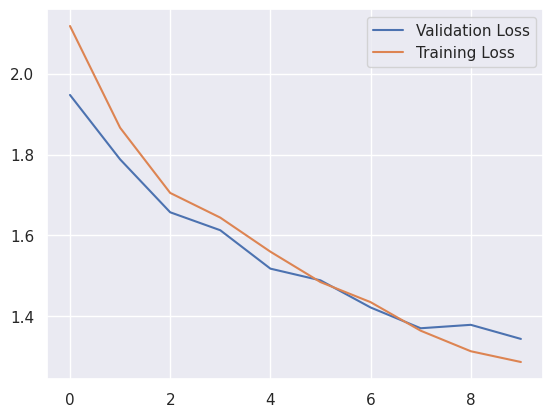

In [33]:
plt.plot(answers.history['val_loss'],label='Validation Loss');
plt.plot(answers.history['loss'],label='Training Loss');
plt.legend();

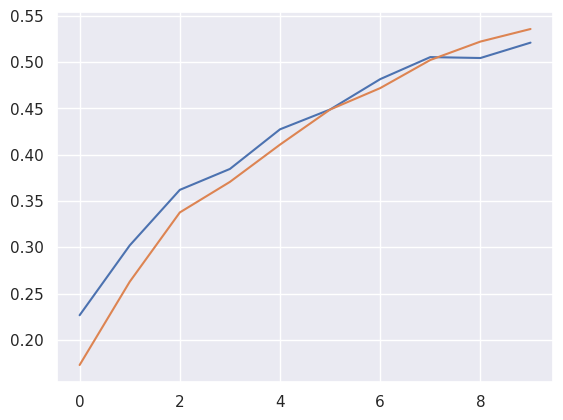

In [34]:
plt.plot(answers.history['val_accuracy'],label='Validation Accuracy');
plt.plot(answers.history['accuracy'],label='Training Accuracy');
plt.legend;